# Basics on loading and plotting SUNTANS output netcdf data

In [3]:
from sfoda.suntans.sunxray import Sunxray
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Sunxray?

Init signature: Sunxray(ncfile, lazy=False, **kwargs)
Docstring:     
SUNTANS-xray wrapper

UPlot inherits everything from the HybridGrid class

xray object is stored in the "_ds" attribute
File:           ~/code/sfoda/sfoda/suntans/sunxray.py
Type:           type
Subclasses:     


In [6]:
ncfile = '../tidal_front_periodic/data/TideFront_0001.nc'

sun = Sunxray(ncfile)
sun

<xarray.Dataset>
Dimensions:       (Nc: 6144, Ne: 12320, Nk: 40, Nkw: 41, Np: 6369, Two: 2, numsides: 4, time: 24)
Coordinates:
    xv            (Nc) float64 ...
    yv            (Nc) float64 ...
    xe            (Ne) float64 ...
    ye            (Ne) float64 ...
    z_r           (Nk) float64 ...
    z_w           (Nkw) float64 ...
    Nk            (Nc) int32 40 40 40 40 40 40 40 40 ... 40 40 40 40 40 40 40 40
  * time          (time) datetime64[ns] 2000-01-16 ... 2000-01-30T09:00:00
Dimensions without coordinates: Nc, Ne, Nkw, Np, Two, numsides
Data variables:
    suntans_mesh  int32 ...
    cells         (Nc, numsides) int32 0 193 194 1 1 ... 6174 6367 6368 6175
    nfaces        (Nc) int32 ...
    face          (Nc, numsides) int32 ...
    edges         (Ne, Two) int32 ...
    neigh         (Nc, numsides) int32 ...
    grad          (Ne, Two) int32 ...
    xp            (Np) float64 0.0 1.927e+03 3.854e+03 ... 3.681e+05 3.7e+05
    yp            (Np) float64 0.0 0.0 0.0 0.0 0.

In [10]:
# Inspect a variable
sun._ds['temp']

<xarray.DataArray 'temp' (time: 24, Nk: 40, Nc: 6144)>
[5898240 values with dtype=float64]
Coordinates:
    xv       (Nc) float64 963.5 2.891e+03 4.818e+03 ... 3.671e+05 3.69e+05
    yv       (Nc) float64 781.2 781.2 781.2 ... 4.922e+04 4.922e+04 4.922e+04
    z_r      (Nk) float64 ...
    Nk       (Nc) int32 40 40 40 40 40 40 40 40 40 ... 40 40 40 40 40 40 40 40
  * time     (time) datetime64[ns] 2000-01-16 ... 2000-01-30T09:00:00
Dimensions without coordinates: Nc
Attributes:
    long_name:  Water temperature
    units:      degrees C
    mesh:       suntans_mesh
    location:   face

In [13]:
# Load one time step
sst = sun._ds['temp'][0,0,:]

Text(0.5, 1.0, '2000-01-16T00:00:00.000000000')

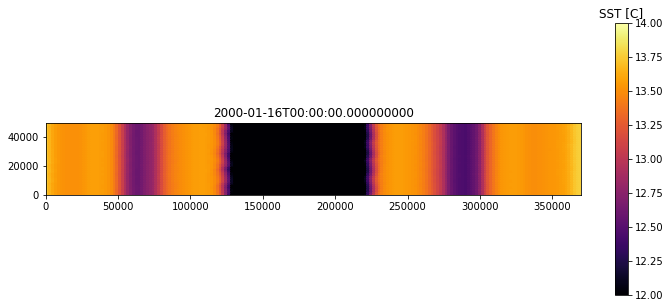

In [24]:
# Plot some data
plt.figure(figsize=(12,5))
_, _, pc, cb = sun.plotcelldata(sst, colorbar=True, vmin=12, vmax=14, cmap='inferno')
cb.ax.set_title('SST [C]')
plt.title(sun._ds.time[0].values)


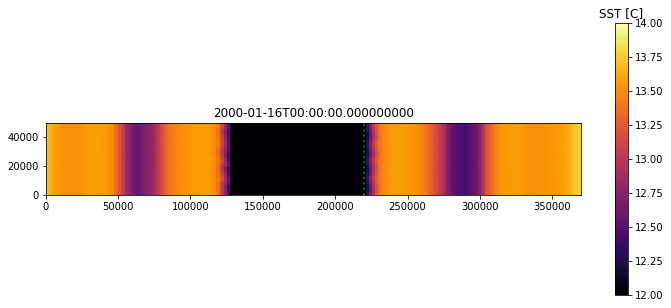

In [37]:
# Interpolate data onto a line
yline = np.linspace(0,50000,100)
xline = 220000*np.ones_like(yline)

sst_line = sun.interpolate(sst, xline, yline, kind='cubic')

plt.figure(figsize=(12,5))
_, _, pc, cb = sun.plotcelldata(sst, colorbar=True, vmin=12, vmax=14, cmap='inferno')
cb.ax.set_title('SST [C]')
plt.title(sun._ds.time[0].values)
plt.plot(xline, yline ,'g:', lw=2)

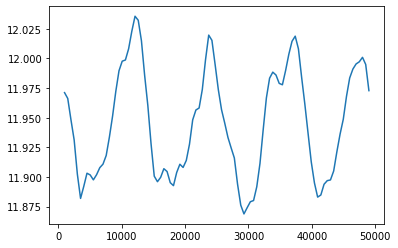

In [38]:
plt.figure()
plt.plot(yline, sst_line)

In [39]:
# Exercise: interpolate onto a grid and do a 2D FFT

# Now let's do a vertical slice...

In [40]:
from sfoda.suntans.sunslice import SliceEdge

In [41]:
SliceEdge

sfoda.suntans.sunslice.SliceEdge

In [73]:
xslice = np.linspace(0.2e5, 3.5e5,100)
yslice = 2.5e4*np.ones_like(xslice)

sunslice = SliceEdge(ncfile, xslice, yslice)

Loading: ../tidal_front_periodic/data/TideFront_0001.nc
Cannot find variable: lonv
Cannot find variable: latv
Cannot find variable: lonp
Cannot find variable: latp
Cannot find variable: mnptr
Cannot find variable: eptr
Warning - no cartographic projection specified
Warning - no cartographic projection specified


In [74]:
tempslice = sunslice('temp', [0], method='mean')

In [75]:
tempslice.shape

(40, 172)

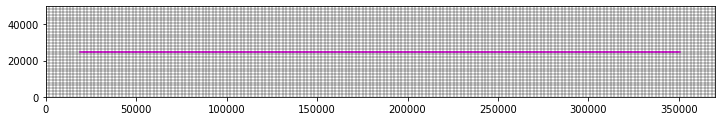

In [76]:
plt.figure(figsize=(12,5))
sunslice.plotedges()

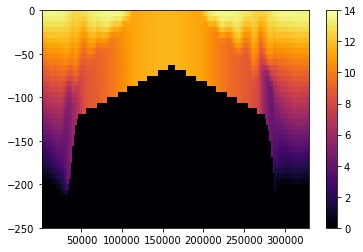

In [77]:
plt.figure()
sunslice.clim= [0,14]
sunslice.plot(tempslice, cmap='inferno')

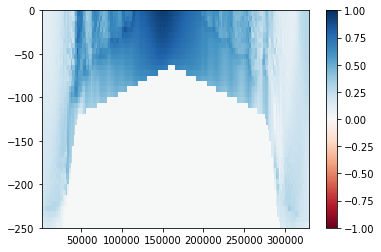

In [78]:
vslice = sunslice('vc', [0], method='mean')

plt.figure()
sunslice.clim= [-1., 1.]
sunslice.plot(vslice, cmap='RdBu')